<a href="https://colab.research.google.com/github/Chetan065/ToDoList/blob/master/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0716 - val_loss: 0.0297
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0045 - val_loss: 6.8186e-04
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019 - val_loss: 6.2608e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0014 - val_loss: 4.2088e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0014 - val_loss: 1.0802e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/

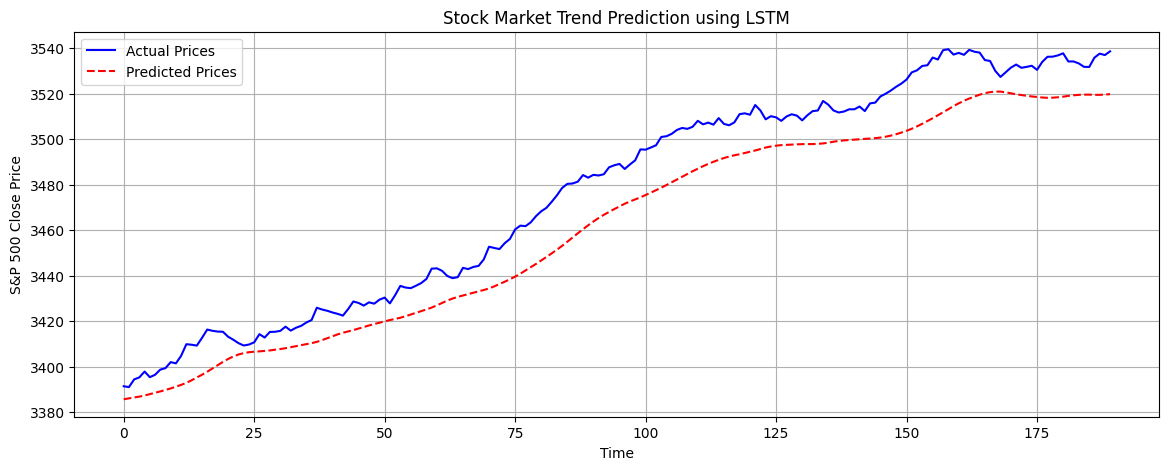

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


dataset_path = "sp500_sample.csv"
sp500_data = pd.read_csv(dataset_path, parse_dates=['Date'], index_col='Date')


data = sp500_data[['Close']]


scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)


def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 50
X, y = create_sequences(data_scaled, time_steps)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(14,5))
plt.plot(y_test_actual, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle='dashed')
plt.legend()
plt.xlabel("Time")
plt.ylabel("S&P 500 Close Price")
plt.title("Stock Market Trend Prediction using LSTM")
plt.grid()
plt.show()


In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow